# Air Conditioner Price Prediction Using Multiple Linear Regression and Random Forest
### By: Connie Chung
Source: https://www.kaggle.com/datasets/ahmedgaitani/air-conditioner-prices-dataset

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [95]:
df = pd.read_csv('/Users/conniechung/Desktop/air_conditioner_prices_dataset.csv')

In [96]:
#looking at the first few rows of the data
df.head()

,Brand,Capacity (BTUs),EER/SEER,Type,Features,Location,Age (years),Price ($)
0,Brand A,18000,14.6,Portable,Quiet,India,3,239
1,Brand C,8000,12.3,Portable,WiFi,USA,4,348
2,Brand B,15000,12.4,Window,WiFi,Europe,4,325
3,Brand C,18000,15.6,Split,Standard,Australia,4,480
4,Brand C,12000,17.5,Portable,"Inverter Technology, WiFi",Australia,2,881


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            200 non-null    object 
 1   Capacity (BTUs)  200 non-null    int64  
 2   EER/SEER         200 non-null    float64
 3   Type             200 non-null    object 
 4   Features         200 non-null    object 
 5   Location         200 non-null    object 
 6   Age (years)      200 non-null    int64  
 7   Price ($)        200 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 12.6+ KB


In [98]:
#summary statistics
df.describe()

,Capacity (BTUs),EER/SEER,Age (years),Price ($)
count,200.000000,200.000000,200.000000,200.000000
mean,12305.000000,16.112500,2.360000,604.850000
std,3507.633456,2.386687,1.129949,222.109931
min,8000.000000,12.000000,1.000000,203.000000
25%,10000.000000,13.850000,1.000000,435.500000
50%,12000.000000,16.400000,2.000000,592.500000
75%,15000.000000,18.050000,3.000000,802.500000
max,18000.000000,20.000000,4.000000,998.000000


In [99]:
#checking to see if there are any duplicated data
df.duplicated().sum()

0

In [100]:
#checking to see if there are any null data
df.isnull().sum()

Brand              0
Capacity (BTUs)    0
EER/SEER           0
Type               0
Features           0
Location           0
Age (years)        0
Price ($)          0
dtype: int64

In [101]:
#checking to see how many brands there are
df['Brand'].unique()

array(['Brand A', 'Brand C', 'Brand B'], dtype=object)

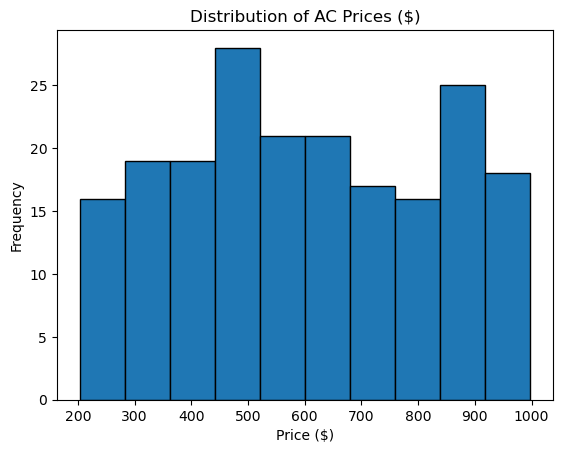

In [102]:
#visualization of the distribution of AC prices
plt.hist(df['Price ($)'], edgecolor='black')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of AC Prices ($)')
plt.show()

<Axes: xlabel='Capacity (BTUs)', ylabel='Price ($)'>

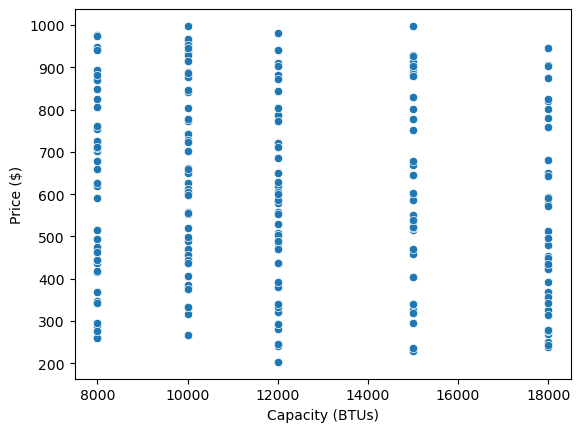

In [103]:
#scatterplot of Capacity (BTUs) and Price ($)
sns.scatterplot(x='Capacity (BTUs)', y='Price ($)', data=df)

In [104]:
#encoding the categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Brand'] = le.fit_transform(df['Brand'])
df['Type'] = le.fit_transform(df['Type'])
df['Features'] = le.fit_transform(df['Features'])
df['Location'] = le.fit_transform(df['Location'])

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            200 non-null    int64  
 1   Capacity (BTUs)  200 non-null    int64  
 2   EER/SEER         200 non-null    float64
 3   Type             200 non-null    int64  
 4   Features         200 non-null    int64  
 5   Location         200 non-null    int64  
 6   Age (years)      200 non-null    int64  
 7   Price ($)        200 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 12.6 KB


In [106]:
#loading the data, defining the target variable
X = df[['Brand', 'Capacity (BTUs)', 'EER/SEER', 'Type', 'Features', 'Location', 'Age (years)']]
y = df['Price ($)']

In [107]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [108]:
#using standard scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Multiple Linear Regression

In [109]:
#training the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [110]:
#predicting and evaluating model
y_predict = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))
print('R^2 Score:', r2_score(y_test, y_predict))

Mean Squared Error: 40334.56850804925
R^2 Score: -0.015328158164048755


In [111]:
X.columns

Index(['Brand', 'Capacity (BTUs)', 'EER/SEER', 'Type', 'Features', 'Location',
       'Age (years)'],
      dtype='object')

In [112]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ -8.59175673 -26.15137974   0.27786148  15.1505462    6.46145263
  -8.4728075   11.58868832]
Intercept: 603.575


# Random Forest


In [114]:
from sklearn.ensemble import RandomForestRegressor
#training the model
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)
#predicting and evaluating the model
y_predict_rf = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_predict_rf))
print('R^2 Score:', r2_score(y_test, y_predict_rf))

Mean Squared Error: 40334.56850804925
R^2 Score: -0.015328158164048755
